## 텐서플로우 변경 부분 설명

https://www.tensorflow.org/guide/effective_tf2?hl=ko

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.0.0'

In [3]:
import numpy as np

In [4]:
import pandas as pd

print(pd.__version__)

0.25.1


In [5]:
%ls

 C 드라이브의 볼륨: Windows
 볼륨 일련 번호: 5A74-C7D6

 C:\Users\dahlmoon\Documents\GitHub\python_tensorflow 디렉터리

2019-10-15  오후 07:41    <DIR>          .
2019-10-15  오후 07:41    <DIR>          ..
2019-02-15  오전 12:26            10,244 .DS_Store
2019-10-13  오후 10:57    <DIR>          .ipynb_checkpoints
2019-02-15  오전 12:26    <DIR>          board
2019-03-28  오후 09:29             3,952 gpu와 cpu  test.ipynb
2019-10-13  오후 09:54    <DIR>          graduate-admissions
2019-02-15  오전 12:26    <DIR>          log
2019-02-15  오전 12:26    <DIR>          logs
2019-02-15  오전 12:26                19 README.md
2019-10-12  오전 02:44             7,072 tensonflow 100_tensorflow 상수 알아보기.ipynb
2019-03-25  오후 04:12            33,358 tensonflow 700_tensorboard 알아보기.ipynb
2019-05-01  오전 05:05             6,947 tensonflow_기초.ipynb
2019-02-15  오전 12:26            18,469 tensorboard_1.png
2019-03-25  오후 11:40             5,317 tensorcpu_텐서플로우 버전확인.ipynb
2019-03-25  오후 04:14             9,863 tensorflow 100_fill로 모든 원소를 동일

In [6]:
data = pd.read_csv('./graduate-admissions/Admission_Predict_Ver1.1.csv' )

In [7]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
continuous_features = data[ ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA'] ].values / 100 
categorical_research_features = data[ [ 'Research' ] ].values 

X = np.concatenate( [ continuous_features , categorical_research_features ] , axis=1 )
Y = data[ [ 'Chance of Admit ' ] ].values

In [9]:
X.shape

(500, 7)

In [10]:
import sklearn

In [11]:
from sklearn.model_selection import train_test_split
train_features , test_features ,train_labels, test_labels = train_test_split( X , Y , test_size=0.2 )

## 
train_features , test_features ,train_labels, test_labels = train_test_split( X , Y , test_size=0.2 )

In [12]:
X = tf.constant( train_features , dtype=tf.float32 )
Y = tf.constant( train_labels , dtype=tf.float32 ) 
                                                          
test_X = tf.constant( test_features , dtype=tf.float32 ) 
test_Y = tf.constant( test_labels , dtype=tf.float32 ) 

## 함수 정의 

Mean Squared Error function

The derivative of Mean Squared Error function

Hypothesis function/ Regression function

In [13]:
def mean_squared_error( Y , y_pred ):
    return tf.reduce_mean( tf.square( y_pred - Y ) )

def mean_squared_error_deriv( Y , y_pred ):
    return tf.reshape( tf.reduce_mean( 2 * ( y_pred - Y ) ) , [ 1 , 1 ] )
    
def h ( X , weights , bias ):
    return tf.tensordot( X , weights , axes=1 ) + bias

In [14]:
num_epochs = 10
num_samples = X.shape[0]
batch_size = 10
learning_rate = 0.001

dataset = tf.data.Dataset.from_tensor_slices(( X , Y )) 
dataset = dataset.shuffle( 500 ).repeat( num_epochs ).batch( batch_size )
iterator = dataset.__iter__()

In [15]:
num_features = X.shape[1]
weights = tf.random.normal( ( num_features , 1 ) ) 
bias = 0

epochs_plot = list()
loss_plot = list()

for i in range( num_epochs ) :
    
    epoch_loss = list()
    for b in range( int(num_samples/batch_size) ):
        x_batch , y_batch = iterator.get_next()
   
        output = h( x_batch , weights , bias ) 
        loss = epoch_loss.append( mean_squared_error( y_batch , output ).numpy() )
    
        dJ_dH = mean_squared_error_deriv( y_batch , output)
        dH_dW = x_batch
        dJ_dW = tf.reduce_mean( dJ_dH * dH_dW )
        dJ_dB = tf.reduce_mean( dJ_dH )
    
        weights -= ( learning_rate * dJ_dW )
        bias -= ( learning_rate * dJ_dB ) 
        
    loss = np.array( epoch_loss ).mean()
    epochs_plot.append( i + 1 )
    loss_plot.append( loss ) 
    
    print( 'Loss is {}'.format( loss ) ) 

Loss is 0.06420175731182098
Loss is 0.058597665280103683
Loss is 0.05564403533935547
Loss is 0.05393003299832344
Loss is 0.05309221148490906
Loss is 0.05257267877459526
Loss is 0.05224797874689102
Loss is 0.0521702878177166
Loss is 0.05200834199786186
Loss is 0.051978033035993576


In [16]:
output = h( test_X , weights , bias ) 
labels = test_Y

accuracy_op = tf.metrics.MeanAbsoluteError() 
accuracy_op.update_state( labels , output )
print( 'Mean Absolute Error = {}'.format( accuracy_op.result().numpy() ) )

Mean Absolute Error = 0.2118983417749405


In [17]:
import matplotlib.pyplot as plt

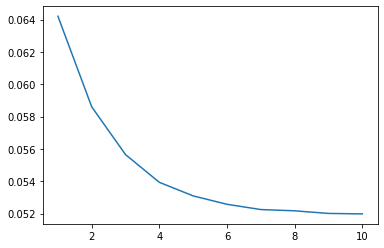

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot( epochs_plot , loss_plot ) 
plt.show()